In [1]:
#Wczytanie bibliotek.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Zmienienie stylu wyświetlanych tabel i ilości cyfr po przecinku w tabeli.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Wczytanie wybranego zbioru danych.
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2021.csv")

In [4]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.000,0,1.000,1,15.000,1.000,0.000,0.000,0,1,1,0,1,0.000,5.000,10.000,20.000,0.000,0,11,4.000,5.000
1,1.000,1,0.000,1,28.000,0.000,0.000,1.000,0,1,0,0,1,0.000,2.000,0.000,0.000,0.000,0,11,4.000,3.000
2,1.000,1,1.000,1,33.000,0.000,0.000,0.000,1,1,1,0,1,0.000,2.000,10.000,0.000,0.000,0,9,4.000,7.000
3,1.000,0,1.000,1,29.000,0.000,1.000,1.000,1,1,1,0,1,0.000,5.000,0.000,30.000,1.000,1,12,3.000,4.000
4,0.000,0,0.000,1,24.000,1.000,0.000,0.000,0,0,0,0,1,0.000,3.000,0.000,0.000,1.000,1,13,5.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1.000,1,1.000,1,21.000,0.000,0.000,0.000,1,1,1,0,1,0.000,4.000,0.000,0.000,0.000,1,10,2.000,3.000
236374,0.000,1,0.000,1,25.000,1.000,0.000,0.000,1,1,1,0,0,1.000,2.000,20.000,0.000,0.000,0,3,4.000,5.000
236375,0.000,0,1.000,1,31.000,0.000,0.000,0.000,1,1,1,0,1,0.000,2.000,0.000,0.000,0.000,1,7,6.000,10.000
236376,0.000,1,0.000,1,24.000,0.000,0.000,0.000,1,1,1,0,1,0.000,2.000,0.000,0.000,0.000,1,10,4.000,6.000


In [5]:
#Zmienie nazw niektórych zmiennych.
df.rename(columns = {"Diabetes_binary": "Diabetes",
                     "HighBP": "HighBloodPressure",
                     "HeartDiseaseorAttack": "HeartDiseaseOrAttack",
                     "NoDocbcCost": "NoDocBcCost",
                     "GenHlth": "GeneralHealth",
                     "MentHlth": "MentalHealthNotGood",
                     "PhysHlth": "PhysicalHealthNotGood",
                     "DiffWalk": "WalkingDifficulty",
                     "Sex": "Gender"}, inplace=True)

In [6]:
df

,Diabetes,HighBloodPressure,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseOrAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocBcCost,GeneralHealth,MentalHealthNotGood,PhysicalHealthNotGood,WalkingDifficulty,Gender,Age,Education,Income
0,0.000,0,1.000,1,15.000,1.000,0.000,0.000,0,1,1,0,1,0.000,5.000,10.000,20.000,0.000,0,11,4.000,5.000
1,1.000,1,0.000,1,28.000,0.000,0.000,1.000,0,1,0,0,1,0.000,2.000,0.000,0.000,0.000,0,11,4.000,3.000
2,1.000,1,1.000,1,33.000,0.000,0.000,0.000,1,1,1,0,1,0.000,2.000,10.000,0.000,0.000,0,9,4.000,7.000
3,1.000,0,1.000,1,29.000,0.000,1.000,1.000,1,1,1,0,1,0.000,5.000,0.000,30.000,1.000,1,12,3.000,4.000
4,0.000,0,0.000,1,24.000,1.000,0.000,0.000,0,0,0,0,1,0.000,3.000,0.000,0.000,1.000,1,13,5.000,6.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1.000,1,1.000,1,21.000,0.000,0.000,0.000,1,1,1,0,1,0.000,4.000,0.000,0.000,0.000,1,10,2.000,3.000
236374,0.000,1,0.000,1,25.000,1.000,0.000,0.000,1,1,1,0,0,1.000,2.000,20.000,0.000,0.000,0,3,4.000,5.000
236375,0.000,0,1.000,1,31.000,0.000,0.000,0.000,1,1,1,0,1,0.000,2.000,0.000,0.000,0.000,1,7,6.000,10.000
236376,0.000,1,0.000,1,24.000,0.000,0.000,0.000,1,1,1,0,1,0.000,2.000,0.000,0.000,0.000,1,10,4.000,6.000


In [7]:
#Sprawdzanie ile zbiór posiada zduplikowanych obserwacji.
df.duplicated().sum()

13135

In [8]:
#Usunięcie znalezionych zduplikowanych obserwacji.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
#Wyświetlenie podstawowych informacji o zbiorze danych (typ zmiennych, ilość brakujących i unikatowych wartości poszczególnych zmiennych).
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Purples')

,dtypes,missing#,missing%,unique,count
Diabetes,float64,0,0.000000,2,223243
HighBloodPressure,int64,0,0.000000,2,223243
HighChol,float64,0,0.000000,2,223243
CholCheck,int64,0,0.000000,2,223243
BMI,float64,0,0.000000,84,223243
Smoker,float64,0,0.000000,2,223243
Stroke,float64,0,0.000000,2,223243
HeartDiseaseOrAttack,float64,0,0.000000,2,223243
PhysActivity,int64,0,0.000000,2,223243
Fruits,int64,0,0.000000,2,223243


In [10]:
#Zmienienie typu danych wszystkich zmiennych oprócz "BMI" na int64.
for col in df.columns.drop(["BMI"]):
    df[col] = df[col].astype("int64")

In [11]:
df.head(10)

,Diabetes,HighBloodPressure,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseOrAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocBcCost,GeneralHealth,MentalHealthNotGood,PhysicalHealthNotGood,WalkingDifficulty,Gender,Age,Education,Income
0,0,0,1,1,15.000,1,0,0,0,1,1,0,1,0,5,10,20,0,0,11,4,5
1,1,1,0,1,28.000,0,0,1,0,1,0,0,1,0,2,0,0,0,0,11,4,3
2,1,1,1,1,33.000,0,0,0,1,1,1,0,1,0,2,10,0,0,0,9,4,7
3,1,0,1,1,29.000,0,1,1,1,1,1,0,1,0,5,0,30,1,1,12,3,4
4,0,0,0,1,24.000,1,0,0,0,0,0,0,1,0,3,0,0,1,1,13,5,6
5,0,1,0,1,40.000,1,0,0,1,1,1,0,1,0,3,5,25,1,0,10,4,8
6,0,1,1,1,27.000,1,0,0,0,0,1,0,1,0,4,25,0,0,0,10,5,3
7,1,0,0,1,24.000,0,0,1,0,0,1,0,1,0,4,0,0,0,1,12,6,7
8,0,1,1,1,30.000,0,0,0,0,1,1,0,1,0,2,0,0,0,0,7,4,6
9,0,1,1,1,36.000,1,0,0,0,0,0,0,1,0,4,0,0,0,1,10,4,8


In [12]:
df.tail(10)

,Diabetes,HighBloodPressure,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseOrAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocBcCost,GeneralHealth,MentalHealthNotGood,PhysicalHealthNotGood,WalkingDifficulty,Gender,Age,Education,Income
236368,0,0,1,1,36.000,0,0,0,1,0,1,0,1,0,3,0,0,0,1,8,6,8
236369,1,1,1,1,33.000,0,0,0,0,0,1,0,1,0,2,0,0,1,1,10,4,5
236370,0,0,0,1,19.000,0,0,0,1,1,1,0,1,0,2,0,0,0,1,10,4,1
236371,0,1,1,0,21.000,0,0,0,1,0,1,0,1,0,3,0,0,0,1,8,4,5
236372,0,0,0,1,29.000,0,0,0,1,1,0,0,1,0,2,0,5,0,1,2,6,11
236373,1,1,1,1,21.000,0,0,0,1,1,1,0,1,0,4,0,0,0,1,10,2,3
236374,0,1,0,1,25.000,1,0,0,1,1,1,0,0,1,2,20,0,0,0,3,4,5
236375,0,0,1,1,31.000,0,0,0,1,1,1,0,1,0,2,0,0,0,1,7,6,10
236376,0,1,0,1,24.000,0,0,0,1,1,1,0,1,0,2,0,0,0,1,10,4,6
236377,0,0,1,1,32.000,0,0,0,1,0,0,0,1,0,1,2,2,0,0,6,6,6


In [13]:
#Wyświetlenie kilku statystyk opisowych i wybranych percentylów zbioru.
#Przy okazji szukam potencjalne wartości odstające między min a 1% i między 99% a max.
df.describe(percentiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], include = "all").T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Diabetes,223243.000,0.150,0.357,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
HighBloodPressure,223243.000,0.432,0.495,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
HighChol,223243.000,0.411,0.492,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
CholCheck,223243.000,0.961,0.193,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
BMI,223243.000,29.134,6.646,12.000,18.000,21.000,25.000,28.000,32.000,41.000,50.000,99.000
Smoker,223243.000,0.426,0.495,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
Stroke,223243.000,0.041,0.199,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
HeartDiseaseOrAttack,223243.000,0.091,0.288,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
PhysActivity,223243.000,0.767,0.423,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000
Fruits,223243.000,0.608,0.488,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000


In [14]:
#Wyświetlenie wartości jakie przyjmują zmienne i częstość ich występowania.
for col in df.columns:
    counts = df[col].value_counts()
    percentages = counts / counts.sum() * 100
    print(percentages,"\n") #jednostkom wartości, które się poniżej wyświetlają są procenty, dlatego dtype = float64 dla każdej ze zmiennych

Diabetes
0   85.041
1   14.959
Name: count, dtype: float64 

HighBloodPressure
0   56.836
1   43.164
Name: count, dtype: float64 

HighChol
0   58.919
1   41.081
Name: count, dtype: float64 

CholCheck
1   96.145
0    3.855
Name: count, dtype: float64 

BMI
27.000   8.918
26.000   7.336
24.000   6.907
28.000   6.382
25.000   6.053
          ... 
89.000   0.000
90.000   0.000
95.000   0.000
91.000   0.000
92.000   0.000
Name: count, Length: 84, dtype: float64 

Smoker
0   57.379
1   42.621
Name: count, dtype: float64 

Stroke
0   95.883
1    4.117
Name: count, dtype: float64 

HeartDiseaseOrAttack
0   90.883
1    9.117
Name: count, dtype: float64 

PhysActivity
1   76.686
0   23.314
Name: count, dtype: float64 

Fruits
1   60.764
0   39.236
Name: count, dtype: float64 

Veggies
1   81.877
0   18.123
Name: count, dtype: float64 

HvyAlcoholConsump
0   93.465
1    6.535
Name: count, dtype: float64 

AnyHealthcare
1   96.042
0    3.958
Name: count, dtype: float64 

NoDocBcCost
0   93.252
1

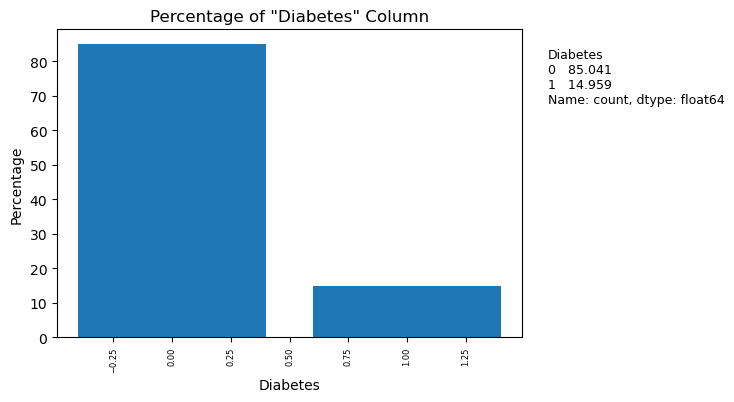

In [15]:
#Stosunek osób, które nie miały i miały cukrzycę.
#Sprawdzam czy zmienna celu jest zbalansowana. Nie jest zbalansowana.
counts = df['Diabetes'].value_counts()
percentages = counts / counts.sum() * 100

plt.figure(figsize=(6, 4))
plt.bar(percentages.index, percentages.values)
plt.title('Percentage of "Diabetes" Column')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.text(1.6, 68, f"{percentages}", fontsize=9, color='black')
plt.xticks(fontsize=6, rotation = 90)
plt.show()

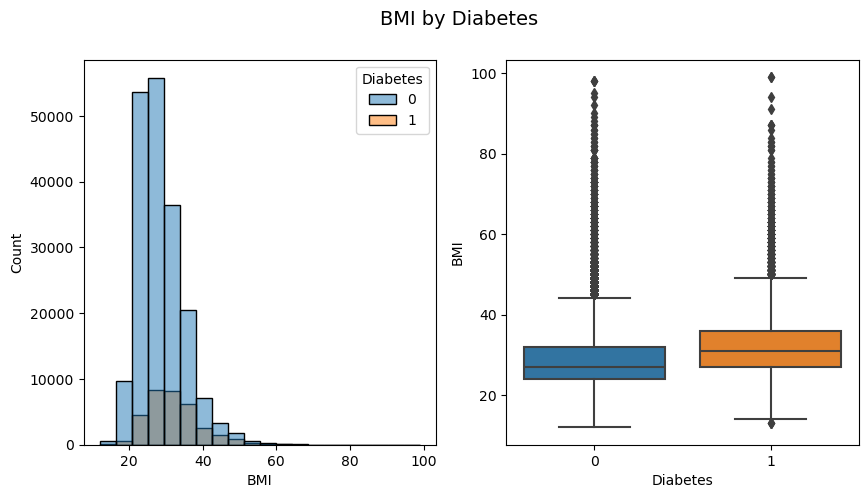

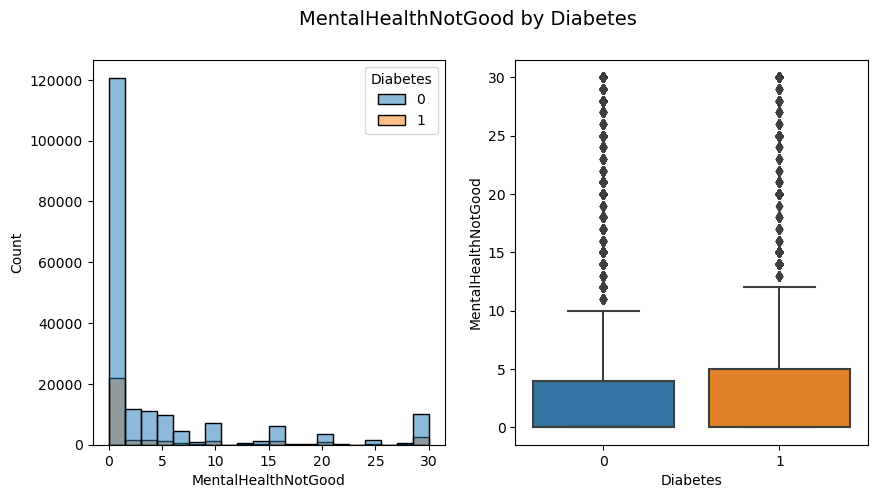

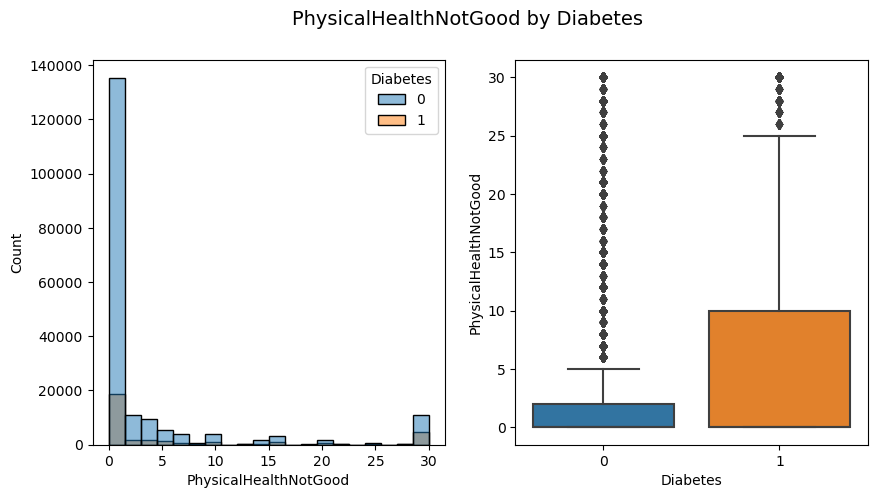

In [16]:
#Wyświetlenie histogramów i boxplotów zmiennych ilościowych z podziałem na osoby, które nie mają i mają cukrzycę.
#Szukam potencjalne wartości odstające.
columns1 = ["BMI", "MentalHealthNotGood", "PhysicalHealthNotGood"]
for col in columns1:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(data=df, x=col, hue='Diabetes', bins=20, ax=ax1)
    sns.boxplot(data=df, x='Diabetes', y=col, ax=ax2)
    fig.suptitle(f'{col} by Diabetes', fontsize=14)
    plt.show()

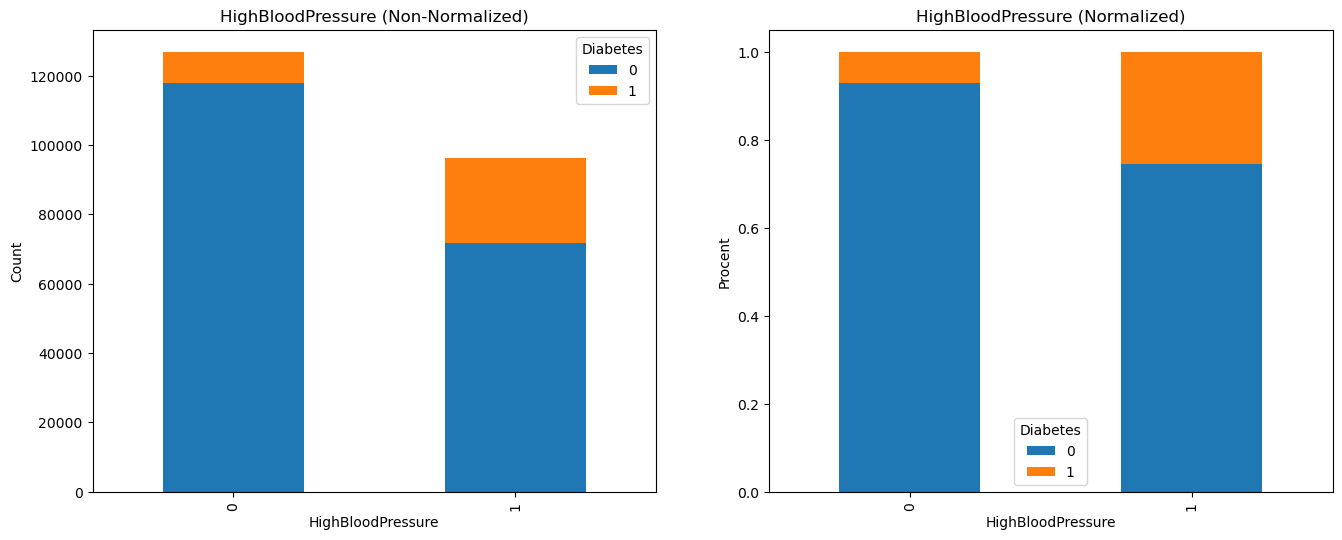

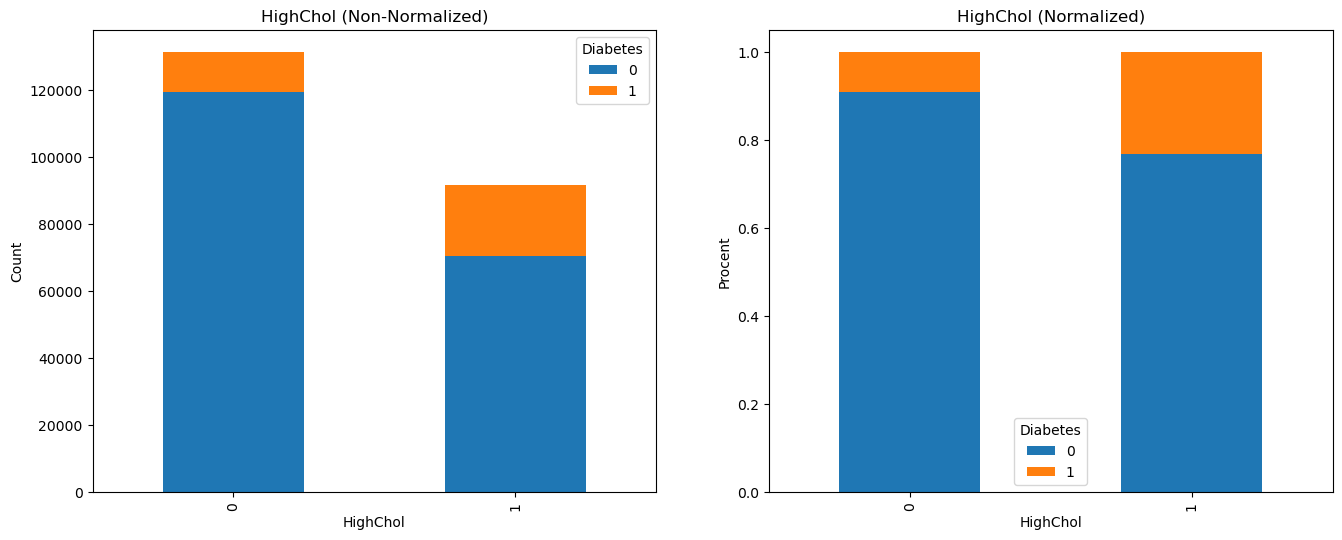

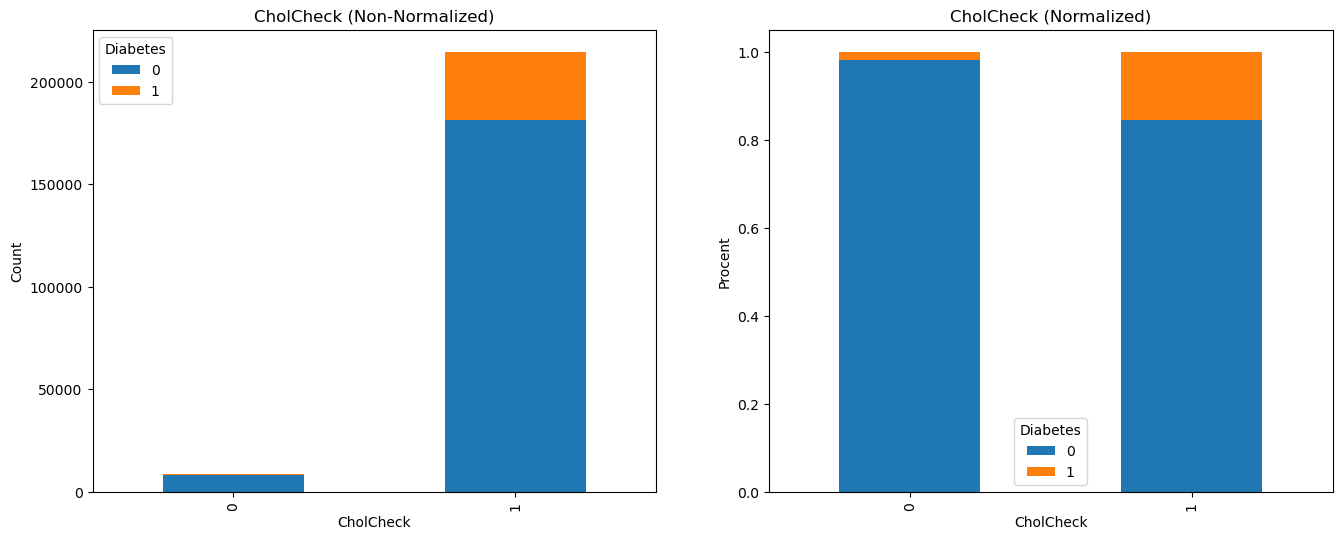

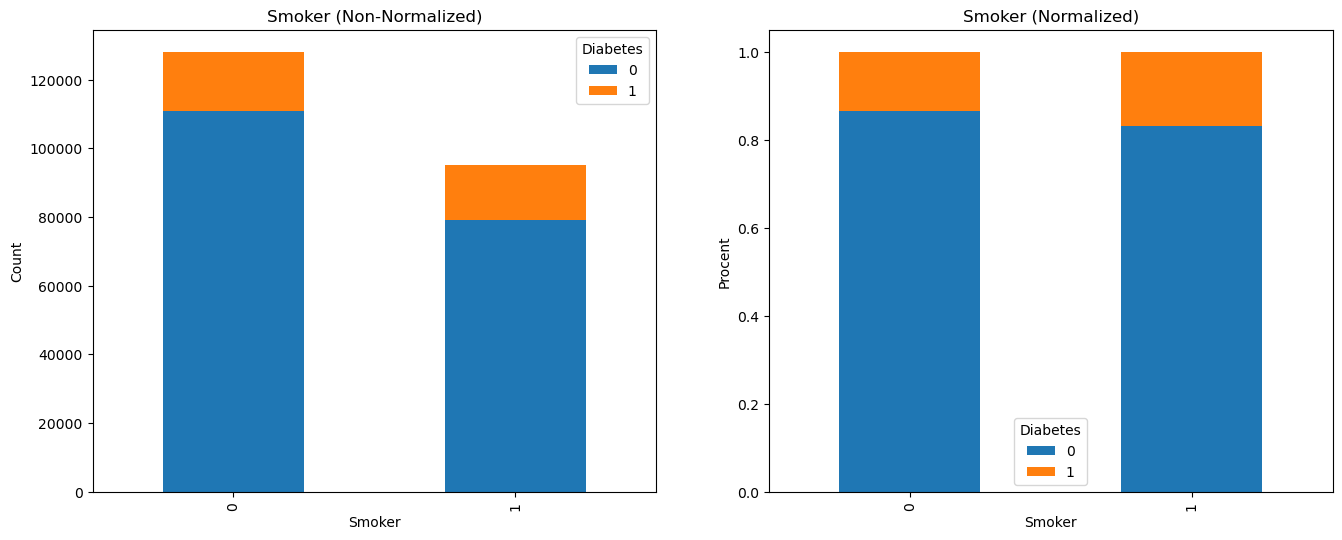

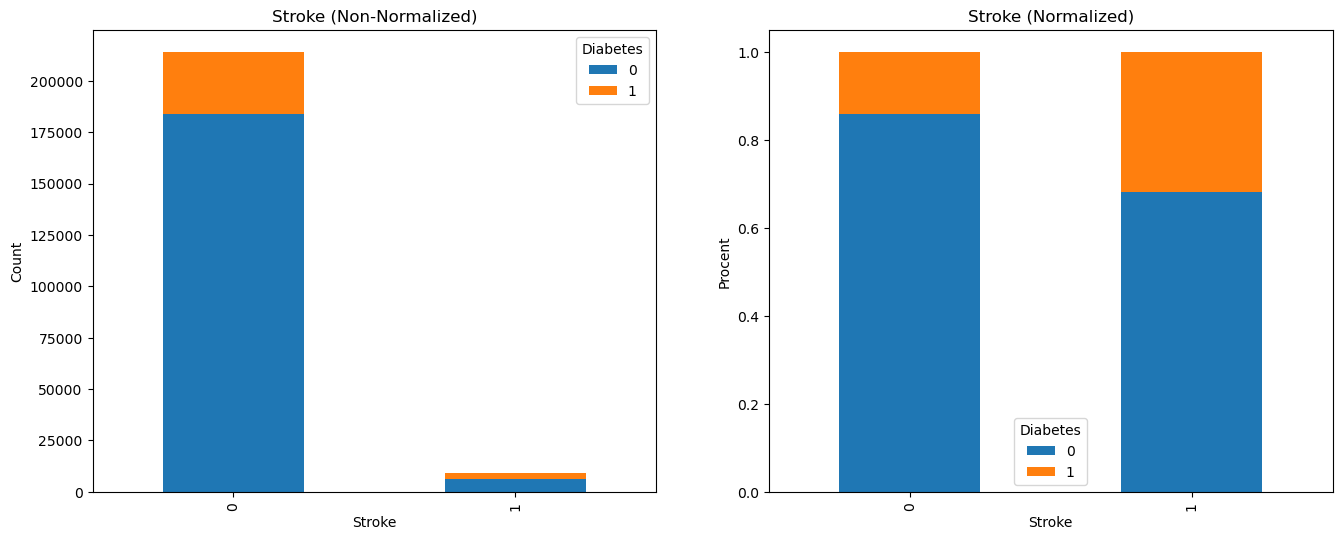

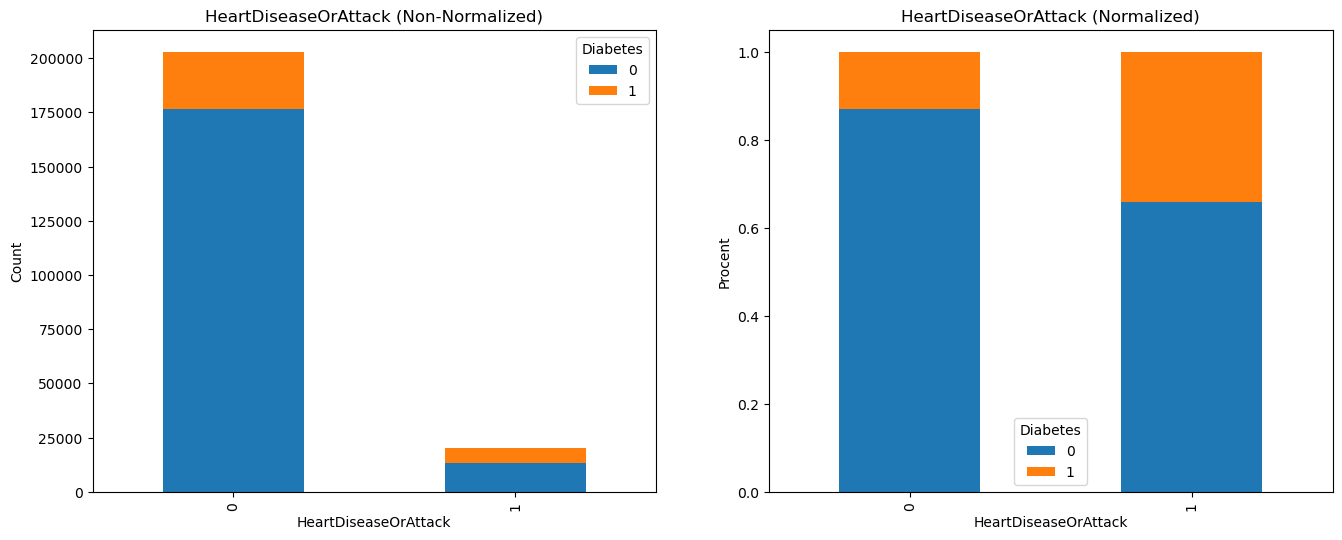

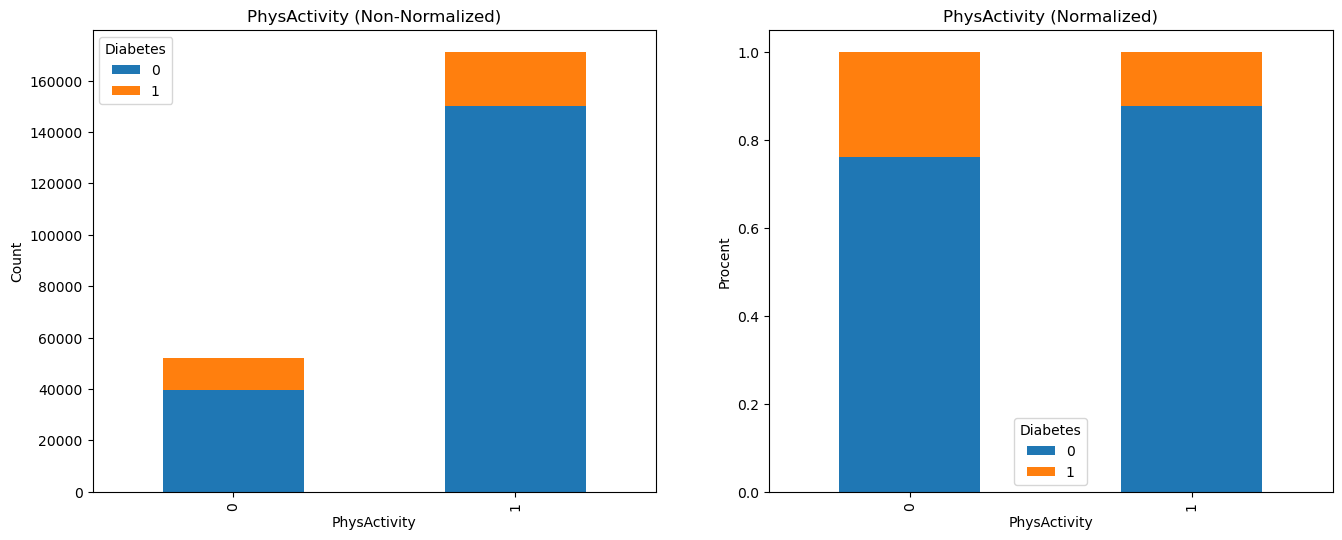

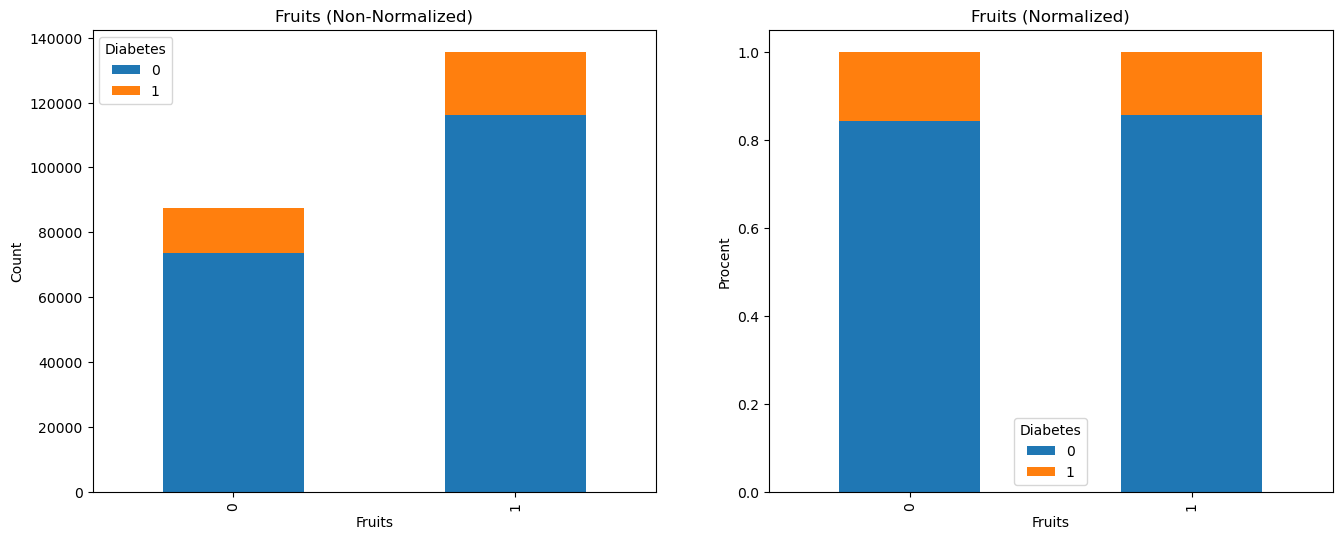

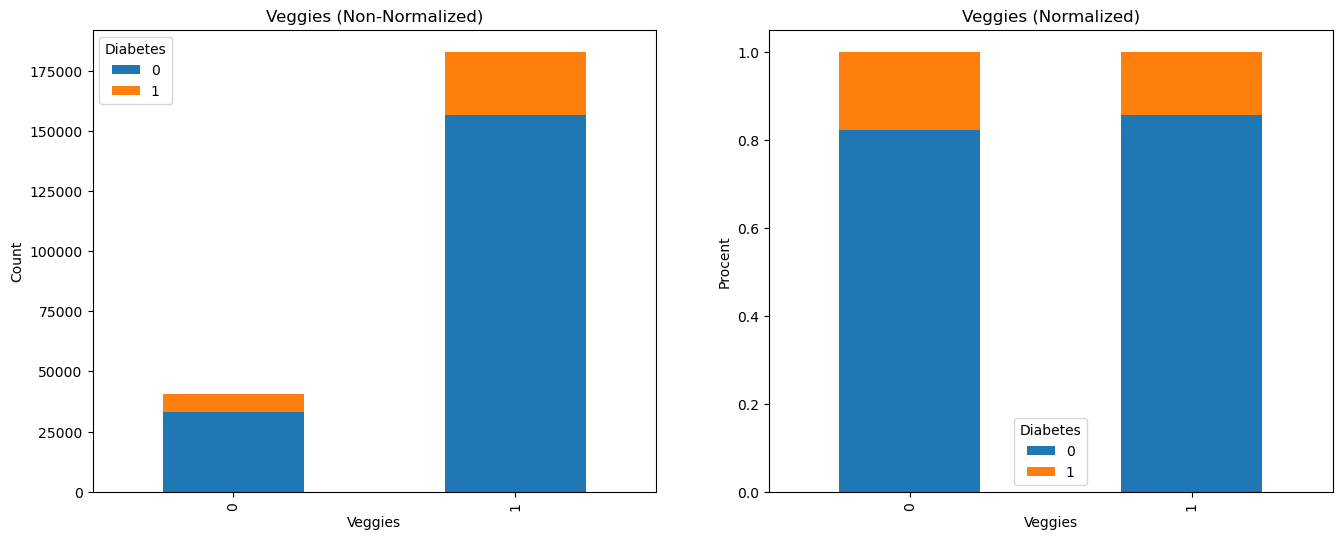

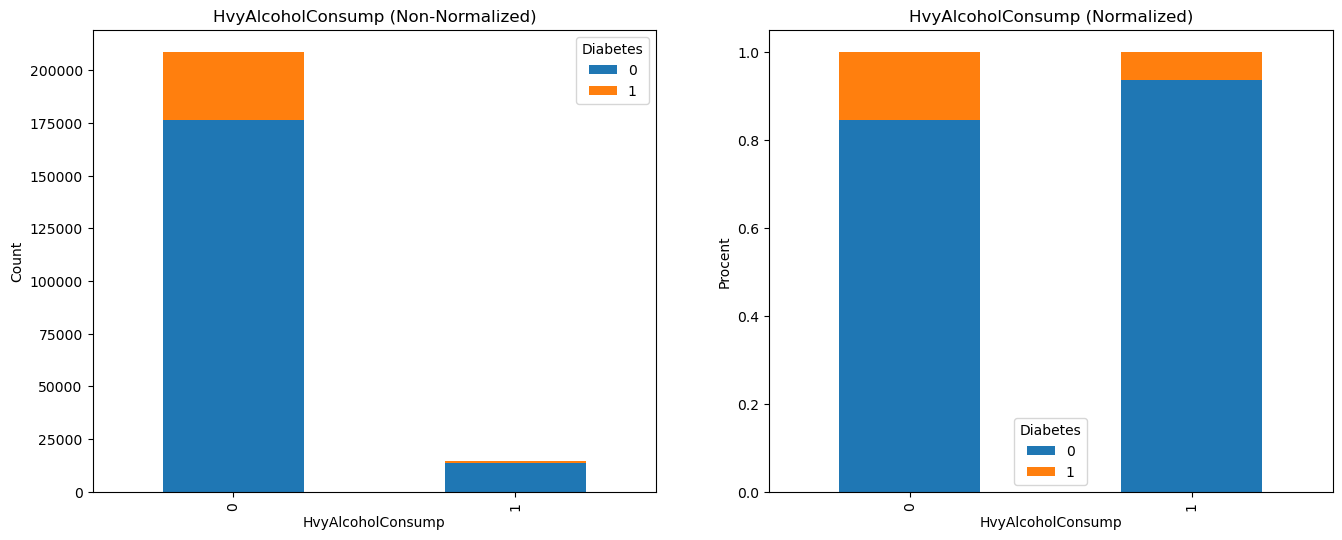

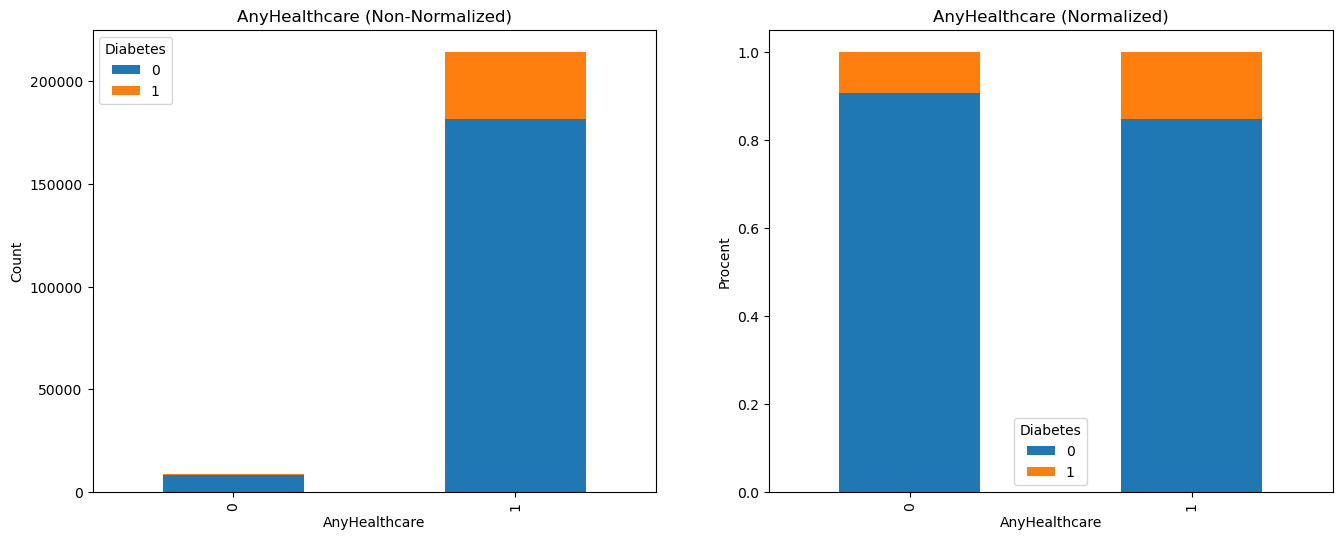

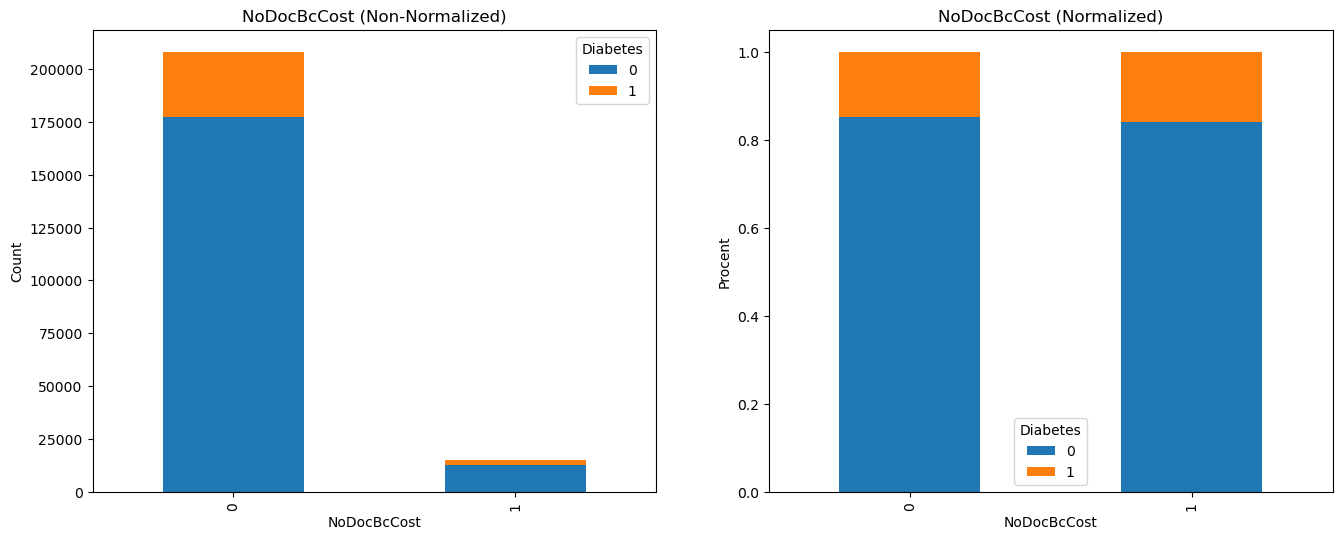

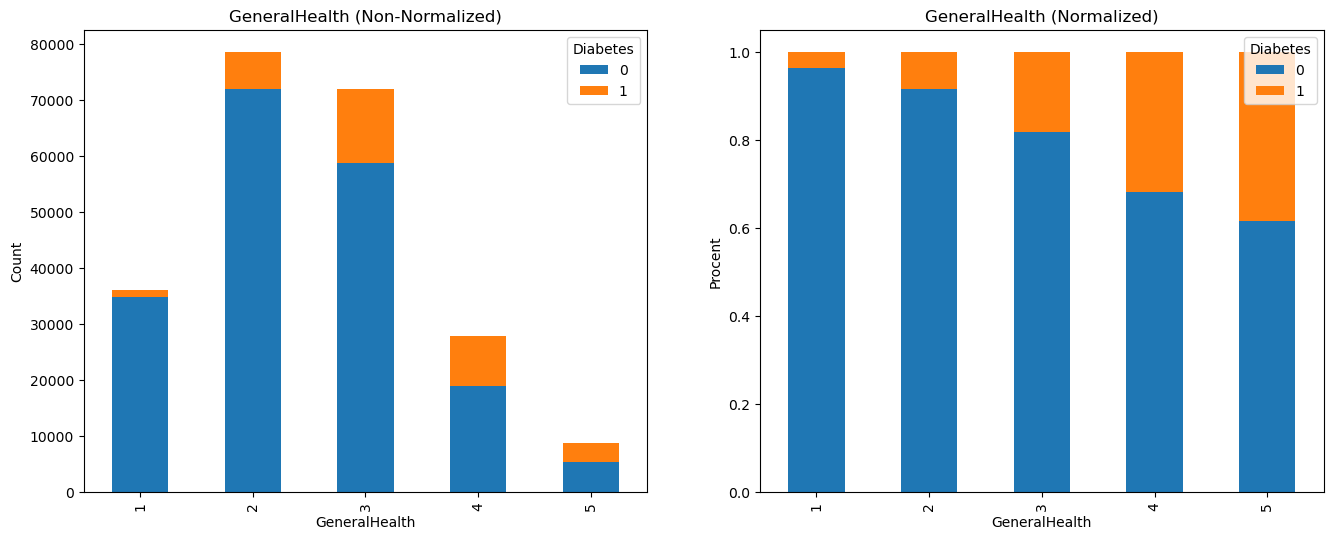

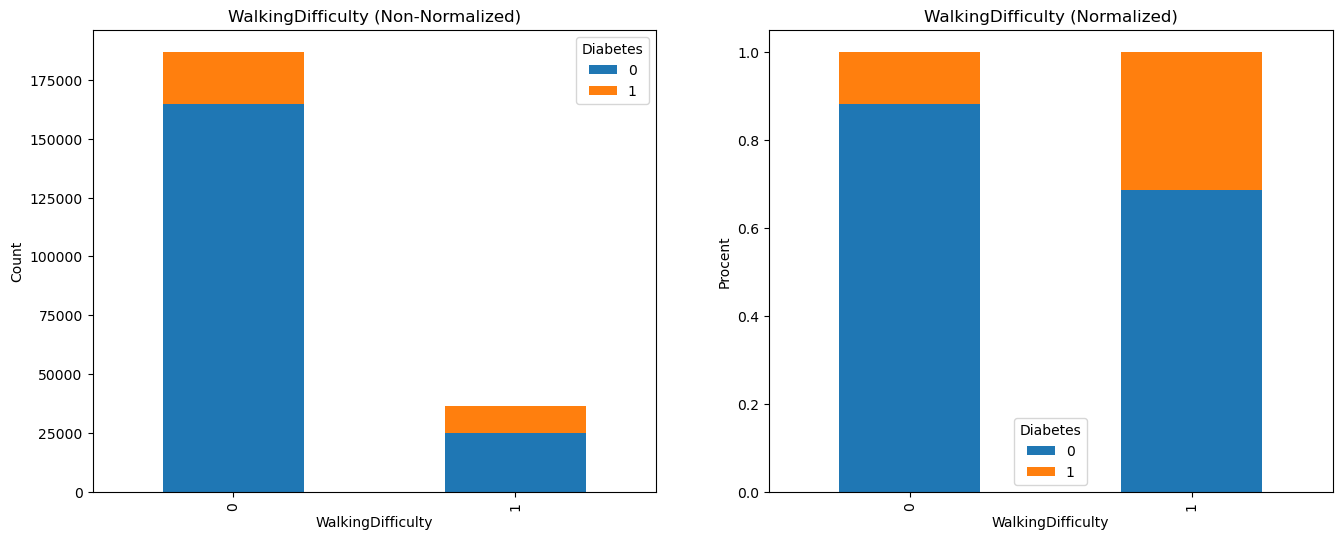

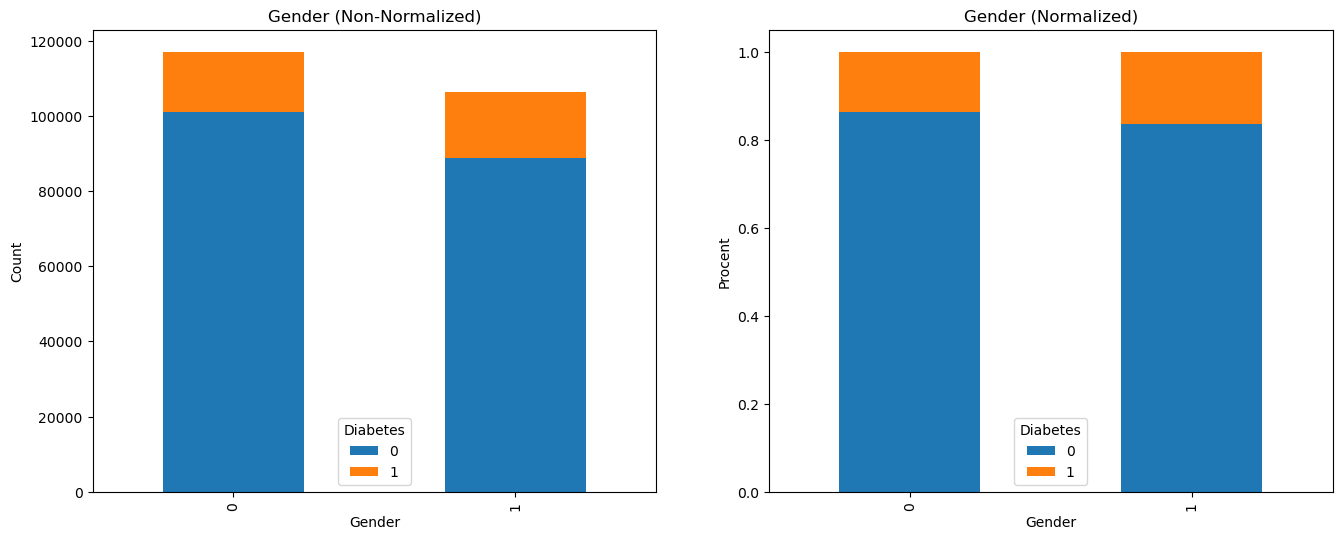

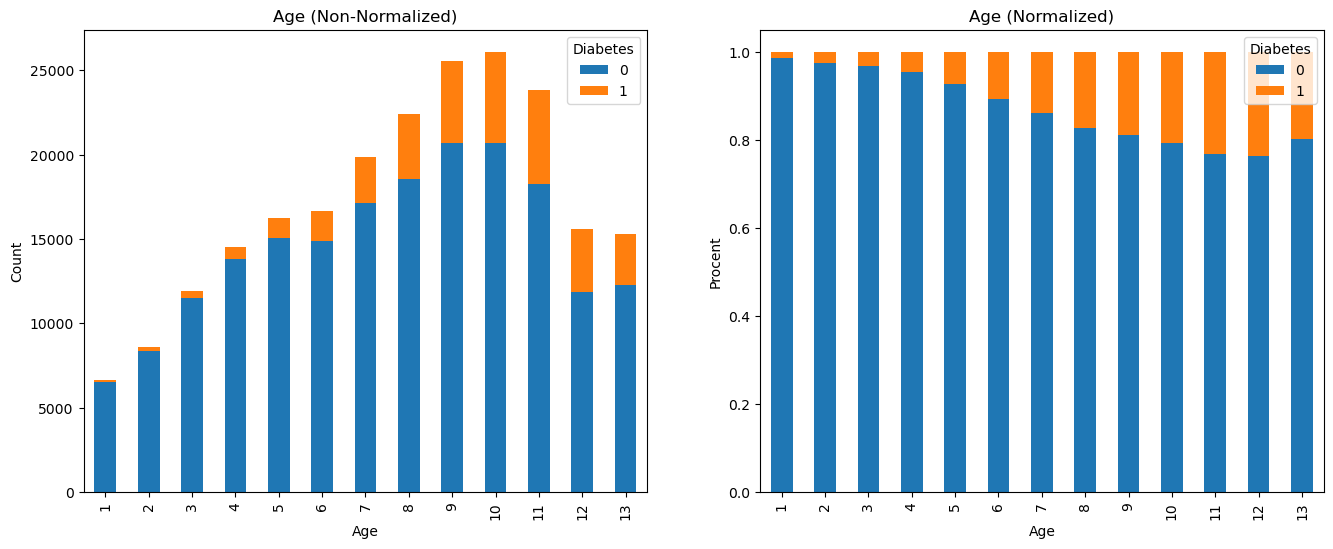

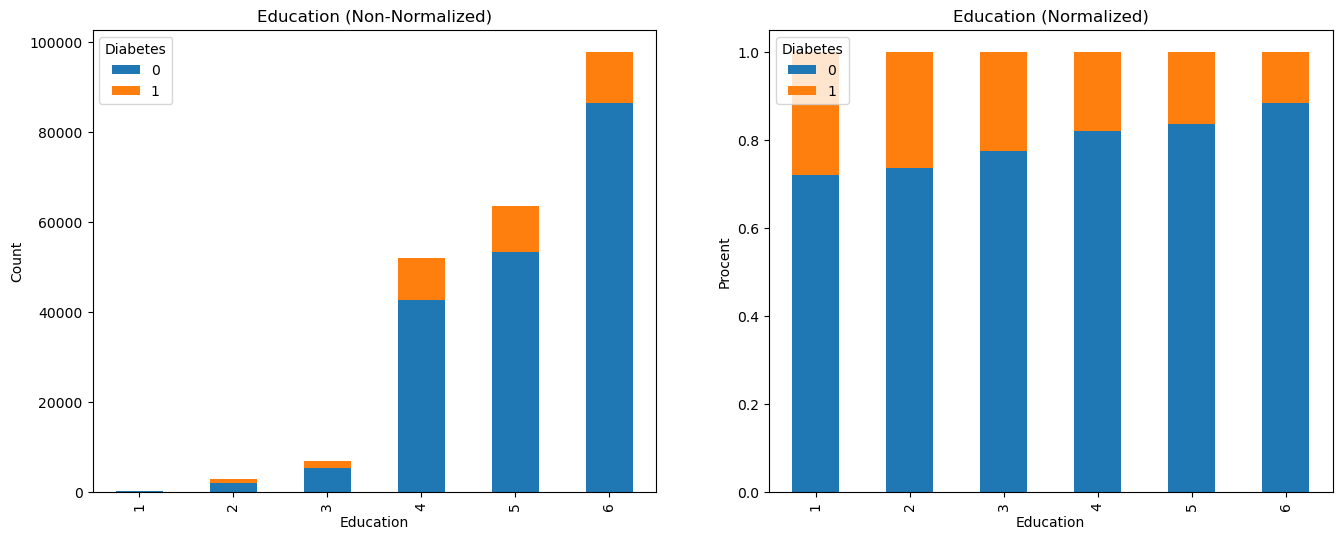

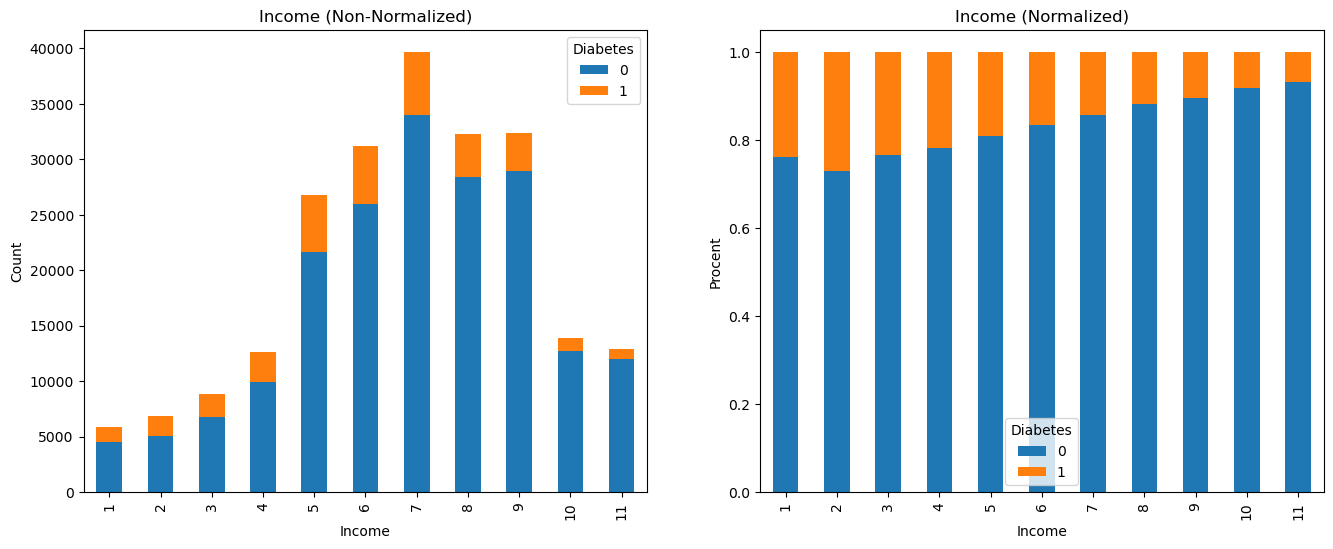

In [17]:
#Wyświetlenie proporcji wartości jakie przyjmują zmienne jakościowe (nieznormalizowane i znormalizowane) z podziałem na osoby, które nie mają
#i mają cukrzycę.
#Szukam potencjalnych zmiennych objaśniających, które można usunąć ze zbioru, gdyż mogą one nie mieć prawie żadnego wpływu na model. 
#Przykładowo dwie kolumny "Fruits (Normalized)" są prawie identyczne, zatem zmienna "Fruits" może nie mieć prawie żadnego wpływu na model.
#Sprawdzam także jakie wartości zmiennych występują relatywnie rzadko w celu ich połączenia. Przykładowo ilość wystąpień wartości 1,2,3 
#zmiennej "Education" jest relatywnie niska, zatem można rozważyć ich połączynie w jedną wartość o nazwie "1-3".
columns2 = ["Diabetes","BMI","MentalHealthNotGood","PhysicalHealthNotGood"]
for col in df.drop(columns=columns2):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    
    df.groupby(col)['Diabetes'].value_counts(normalize=False).unstack().plot(kind='bar', stacked=True, ax=ax[0])
    ax[0].set_title(col + ' (Non-Normalized)')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Count')

    df.groupby(col)['Diabetes'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=ax[1])
    ax[1].set_title(col + ' (Normalized)')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Procent')

    plt.show()

In [18]:
#Po wzrokowej ocenie dotyczącej tego jakie zmienne objaśniające można usunąć ze zbioru, gdyż mogą one nie mieć prawie żadnego wpływu na 
#model, uznałem, że muszę przeprowadzić jeszcze test statystyczny, aby uzyskać pewność jakie zmienne są istotne statystycznie (zmienne 
#nieistotne statystycznie usuwane są ze zbioru). Następnie wyświetliłem korelacje zmiennych, aby uzyskać jeszcze kolejne potwierdzenie jakie 
#zmienne można usunąć ze zbioru.
#Zastosowany test statystyczny: Jeśli wartość p (P>|t|) > alfa = 0.05, to odrzucamy hipotezę zerową, w przeciwnym wypadku nie mamy podstaw do 
#jej odrzucenia. Oznacza to, że gdy wartosć p zmiennej jest większa od 0.05 to należy ją usunąć ze zbioru, gdyż jest ona nieistotna 
#statystycznie.
import statsmodels.api as sm
X, y = df.drop(columns=["Diabetes"]), df["Diabetes"]
X = sm.add_constant(X) #dodanie do modelu stałej

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     1933.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:47:24   Log-Likelihood:                -67966.
No. Observations:              223243   AIC:                         1.360e+05
Df Residuals:                  223221   BIC:                         1.362e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.28

In [19]:
#Cztery zmienne w powyższym modelu posiadają wartość p większą niż 0.05. Największa wartość p została wyliczona dla zmiennej 
#"PhysicalHealthNotGood". Oznacza to, że w pierwszej kolejności usunąłem ją z modelu i kolejno utworzyłem nowy model bez tej zmiennej. 
#Następnie z mojego modelu usunąłem kolejną zmienną, która miała największą wartość p (przy założeniu, że była ona większa od 0.05), aż 
#dopóki wszystkie zmienne modelu nie okazały się istotne statystycznie.
X, y = df.drop(columns=["Diabetes", "PhysicalHealthNotGood"]), df["Diabetes"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2030.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:47:24   Log-Likelihood:                -67966.
No. Observations:              223243   AIC:                         1.360e+05
Df Residuals:                  223222   BIC:                         1.362e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2834 

In [20]:
X, y = df.drop(columns=["Diabetes", "PhysicalHealthNotGood", "Fruits"]), df["Diabetes"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2137.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:47:25   Log-Likelihood:                -67966.
No. Observations:              223243   AIC:                         1.360e+05
Df Residuals:                  223223   BIC:                         1.362e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2832 

In [21]:
X, y = df.drop(columns=["Diabetes", "PhysicalHealthNotGood", "Fruits", "Veggies"]), df["Diabetes"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2255.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:47:25   Log-Likelihood:                -67967.
No. Observations:              223243   AIC:                         1.360e+05
Df Residuals:                  223224   BIC:                         1.362e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2841 

In [22]:
X, y = df.drop(columns=["Diabetes", "PhysicalHealthNotGood", "Fruits", "Veggies", "NoDocBcCost"]), df["Diabetes"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())
#Dopóki model nie zaczął posiadać tylko zmiennych istotnych statystycznie usunąłem z niego zmienne: "PhysicalHealthNotGood", "Fruits", 
#"Veggies", "NoDocBcCost". Zatem te zmienne okazały się być nieistotne statystycznie.

                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     2388.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:47:25   Log-Likelihood:                -67968.
No. Observations:              223243   AIC:                         1.360e+05
Df Residuals:                  223225   BIC:                         1.362e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2861 

E:\Programy2\Anaconda\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


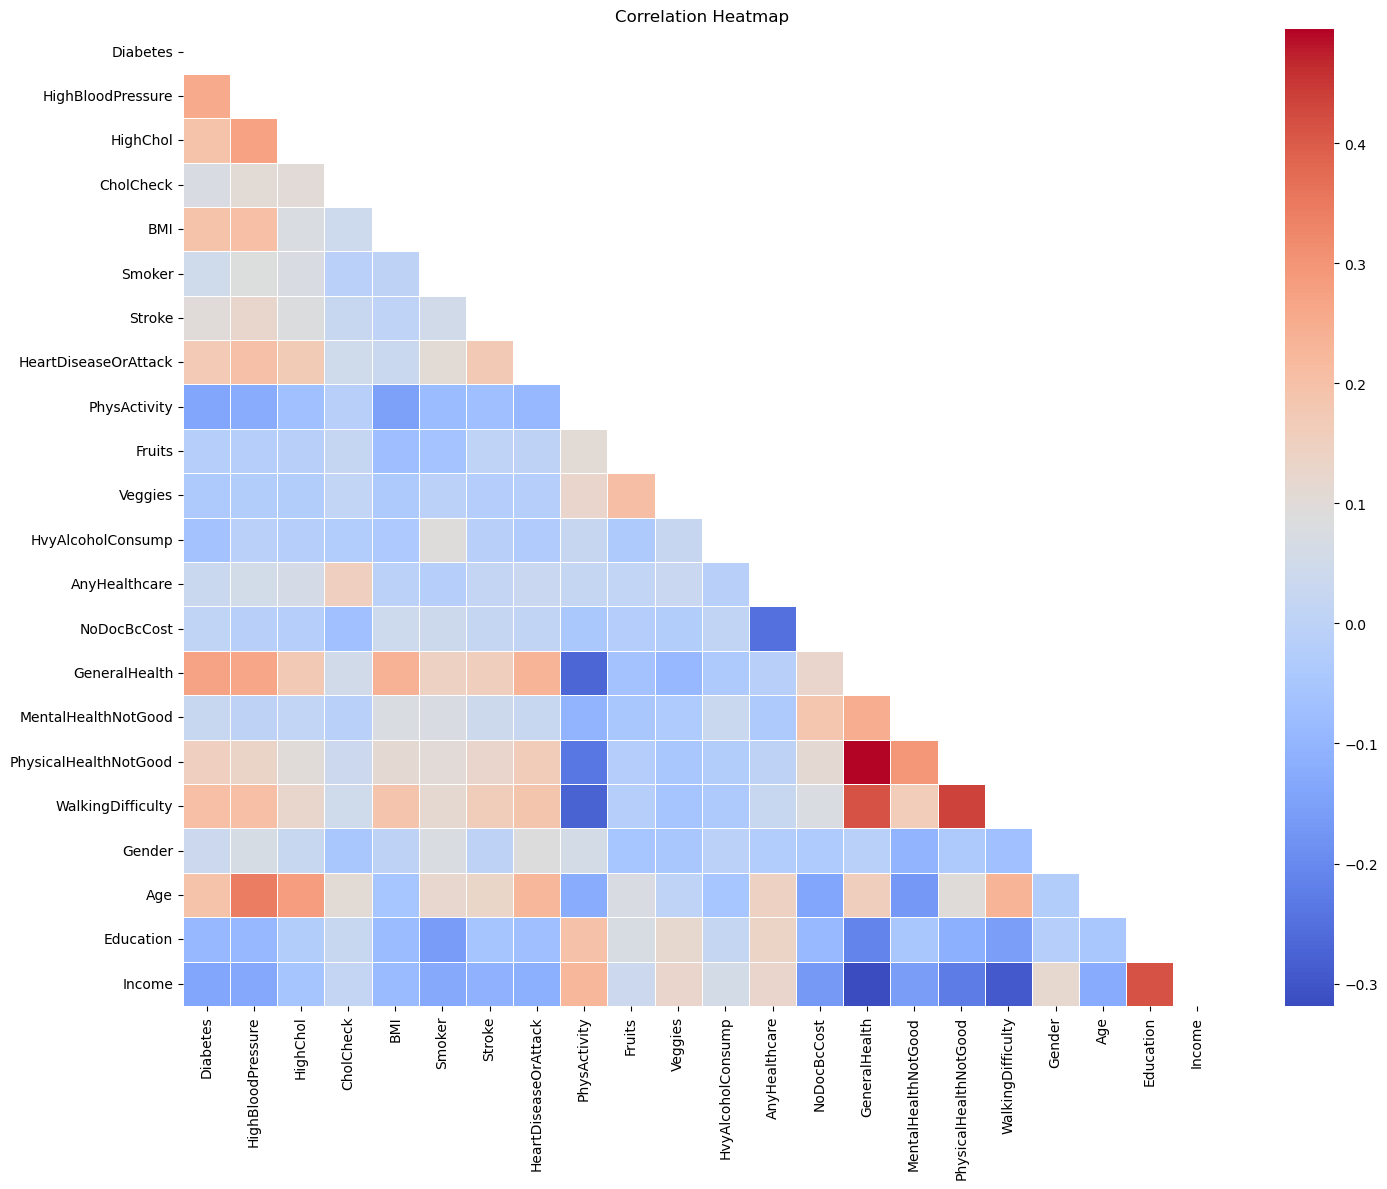

In [23]:
#Wizualizacja korelacji Pearsona.
#Szukam zmiennych wysoko skorelowanych w celu usunięcia ich ze zbioru.
plt.figure(figsize=(15, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', linewidth=.5, annot_kws={'size': 9})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [24]:
#Wyświetlenie tych korelacji, które osiągnęły wartość większą niż 0.4.
corr_triu = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1)).stack().sort_values()
corr_triu[abs(corr_triu)>0.4]

Education              Income                  0.413
GeneralHealth          WalkingDifficulty       0.413
PhysicalHealthNotGood  WalkingDifficulty       0.435
GeneralHealth          PhysicalHealthNotGood   0.495
dtype: float64

In [25]:
#Utworzenie kopii zbioru danych przeznaczonej do edycji.
df_edit = df.copy()

In [26]:
#Na podstawie wzrokowej oceny powyżej zwizualizowanych, pogrupowanych zmiennych, przeprowadzonego testu statystycznego i zwizualizowanej 
#korelacji postanowiono:
df_edit.drop(columns=["PhysicalHealthNotGood", "Fruits", "Veggies", "NoDocBcCost"], inplace = True) #usunąć te zmienne ze zbioru
df_edit['Education'].replace([1,2,3], "1-3", inplace = True) #zamienić wartości 1,2,3 zmiennej "Education" w jedną wartość, gdyż nielicznie 
                                                             #one występowały
df_edit['Education'] = df_edit['Education'].map({"1-3":3, 4:4, 5:5, 6:6})
df_edit #zbiór po edycji

,Diabetes,HighBloodPressure,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseOrAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GeneralHealth,MentalHealthNotGood,WalkingDifficulty,Gender,Age,Education,Income
0,0,0,1,1,15.000,1,0,0,0,0,1,5,10,0,0,11,4,5
1,1,1,0,1,28.000,0,0,1,0,0,1,2,0,0,0,11,4,3
2,1,1,1,1,33.000,0,0,0,1,0,1,2,10,0,0,9,4,7
3,1,0,1,1,29.000,0,1,1,1,0,1,5,0,1,1,12,3,4
4,0,0,0,1,24.000,1,0,0,0,0,1,3,0,1,1,13,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,1,1,1,1,21.000,0,0,0,1,0,1,4,0,0,1,10,3,3
236374,0,1,0,1,25.000,1,0,0,1,0,0,2,20,0,0,3,4,5
236375,0,0,1,1,31.000,0,0,0,1,0,1,2,0,0,1,7,6,10
236376,0,1,0,1,24.000,0,0,0,1,0,1,2,0,0,1,10,4,6


In [27]:
#Ponowne wyświetlenie tych korelacji, które osiągnęły wartość większą niż 0.4, po usunięciu wybranych zmiennych ze zbioru.
corr = df_edit.corr()
corr_triu = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1)).stack().sort_values()
corr_triu[abs(corr_triu)>0.4]

Education      Income              0.413
GeneralHealth  WalkingDifficulty   0.413
dtype: float64

In [28]:
#Ponowne wyświetlenie kilku statystyk opisowych i wybranych percentylów zbioru w celu znalezienia wartości odstających do usunięcia.
df_edit.describe(percentiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], include = "all").T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Diabetes,223243.000,0.150,0.357,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
HighBloodPressure,223243.000,0.432,0.495,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
HighChol,223243.000,0.411,0.492,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
CholCheck,223243.000,0.961,0.193,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
BMI,223243.000,29.134,6.646,12.000,18.000,21.000,25.000,28.000,32.000,41.000,50.000,99.000
Smoker,223243.000,0.426,0.495,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
Stroke,223243.000,0.041,0.199,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
HeartDiseaseOrAttack,223243.000,0.091,0.288,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
PhysActivity,223243.000,0.767,0.423,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000
HvyAlcoholConsump,223243.000,0.065,0.247,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000


In [29]:
#Utworzenie nowego zbioru do przeprowadzenia na nim operacji usuwania wartości odstających.
df_no_outl = df_edit.copy()

In [30]:
#Zbiór posiada wartości odstające i już tylko dwie zmienne ilościowe. Uznałem zatem, że jedyne wartości odstające, które warto usunąć ze 
#zbioru posiada zmienna ilościowa "BMI". W celu ich usunięcia spojrzałem na percentyle zbioru i uznałem, że wartości zmiennej "BMI", które są
#powyżej około percentyla 99% mogą zostać usunięte ze zbioru.
bmi_out = df_no_outl[(df_no_outl["BMI"] < 15) | (df_no_outl["BMI"] > 58)] #Usunięte ze zbioru zostaną osoby mające bmi większe niż 58 
                                                                          #i mniejsze niż 15, gdyż nie chciałem za dużo wartości odstających 
                                                                          #usunąć ze zbioru, gdyż czym więcej ich usuwałem, tym model 
                                                                          #osiągał gorsze wyniki.
bmi_out #To są obserwacje, które zostaną usunięte ze zbioru.

,Diabetes,HighBloodPressure,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseOrAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GeneralHealth,MentalHealthNotGood,WalkingDifficulty,Gender,Age,Education,Income
1075,1,1,0,1,61.000,0,0,1,1,0,0,3,0,0,0,5,6,1
1182,1,1,0,1,63.000,0,0,0,0,0,1,5,30,1,0,2,3,5
1206,0,0,0,1,63.000,0,0,0,0,0,1,5,30,1,0,7,5,5
1775,0,1,0,1,68.000,0,0,0,1,0,1,4,7,1,0,6,3,1
2905,1,1,1,1,62.000,0,0,0,0,0,0,4,6,1,1,6,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235174,0,1,0,1,70.000,1,0,0,0,0,1,1,30,1,1,4,5,1
235419,0,1,0,1,64.000,0,0,0,0,0,1,3,7,1,0,6,5,3
235457,0,0,1,1,14.000,0,0,0,0,0,1,1,0,0,0,6,3,2
235675,1,0,0,1,59.000,0,0,0,1,0,1,4,15,1,0,7,3,5


In [31]:
#Wyświetlenie zbioru, który pozostał po usunięciu z niego powyższych wartości odstających.
df_no_outl = df_no_outl.drop(bmi_out.index)
df_no_outl.reset_index(drop=True, inplace=True)
df_no_outl

,Diabetes,HighBloodPressure,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseOrAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GeneralHealth,MentalHealthNotGood,WalkingDifficulty,Gender,Age,Education,Income
0,0,0,1,1,15.000,1,0,0,0,0,1,5,10,0,0,11,4,5
1,1,1,0,1,28.000,0,0,1,0,0,1,2,0,0,0,11,4,3
2,1,1,1,1,33.000,0,0,0,1,0,1,2,10,0,0,9,4,7
3,1,0,1,1,29.000,0,1,1,1,0,1,5,0,1,1,12,3,4
4,0,0,0,1,24.000,1,0,0,0,0,1,3,0,1,1,13,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222587,1,1,1,1,21.000,0,0,0,1,0,1,4,0,0,1,10,3,3
222588,0,1,0,1,25.000,1,0,0,1,0,0,2,20,0,0,3,4,5
222589,0,0,1,1,31.000,0,0,0,1,0,1,2,0,0,1,7,6,10
222590,0,1,0,1,24.000,0,0,0,1,0,1,2,0,0,1,10,4,6


In [32]:
#Wyświetlenie statystyki opisowej i wybranych percentyli zbioru, który pozostał po usunięciu z niego powyższych wartości odstających.
df_no_outl.describe(percentiles = [0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], include = "all").T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Diabetes,222592.000,0.149,0.356,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
HighBloodPressure,222592.000,0.431,0.495,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
HighChol,222592.000,0.411,0.492,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
CholCheck,222592.000,0.961,0.193,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
BMI,222592.000,29.050,6.374,15.000,18.000,21.000,25.000,28.000,32.000,41.000,49.000,58.000
Smoker,222592.000,0.426,0.495,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000
Stroke,222592.000,0.041,0.199,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
HeartDiseaseOrAttack,222592.000,0.091,0.288,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
PhysActivity,222592.000,0.768,0.422,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000
HvyAlcoholConsump,222592.000,0.065,0.247,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000


In [33]:
#Wyświetlenie unikatowych wartości zbioru bez usuniętych wartości odstających (df_edit) i zbioru z usuniętymi wartościami odstającymi
#(df_no_outl)
n1 = df_edit.nunique()
n1 = pd.DataFrame(n1)
n1.columns = ['df_edit.nunique']

n2 = df_no_outl.nunique()
n2 = pd.DataFrame(n2)
n2.columns = ['df_no_outl.nunique']

n_all = pd.concat([n1, n2], axis = 1)
n_all

,df_edit.nunique,df_no_outl.nunique
Diabetes,2,2
HighBloodPressure,2,2
HighChol,2,2
CholCheck,2,2
BMI,84,44
Smoker,2,2
Stroke,2,2
HeartDiseaseOrAttack,2,2
PhysActivity,2,2
HvyAlcoholConsump,2,2


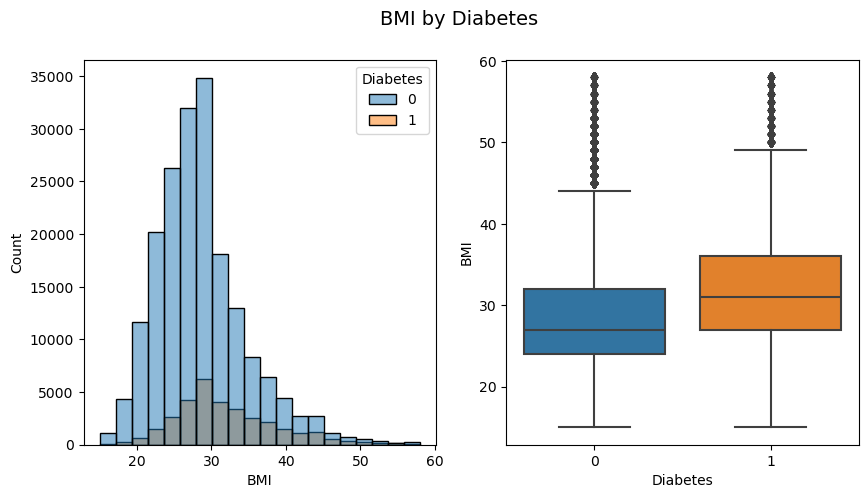

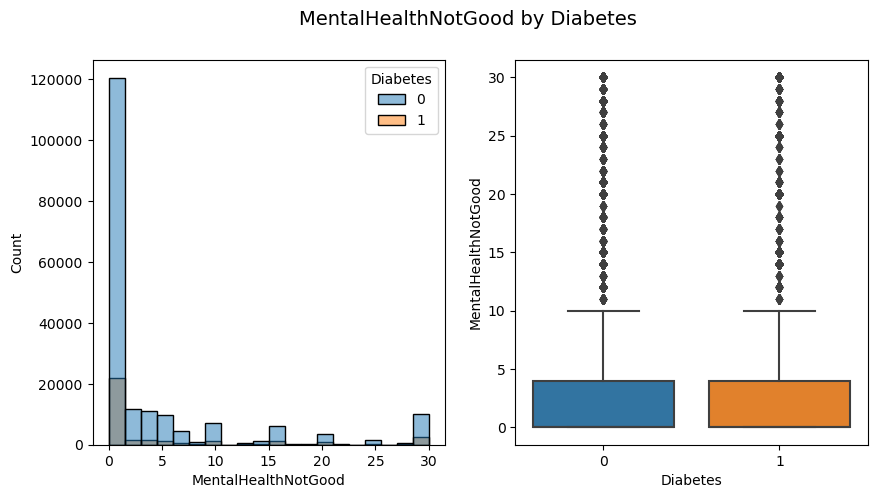

In [34]:
#Ponowne wyświetlenie histogramów i boxplotów zmiennych iliościowych z podziałem na osoby, które nie mają i mają cukrzycę po usunięciu ze 
#zbioru wartości odstających.
columns3 = ["BMI", "MentalHealthNotGood"]

for col in columns3:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    sns.histplot(data=df_no_outl, x=col, hue='Diabetes', bins=20, ax=ax1)
    sns.boxplot(data=df_no_outl, x='Diabetes', y=col, ax=ax2)
    fig.suptitle(f'{col} by Diabetes', fontsize=14)
    plt.show()

In [35]:
#Wczytanie bibliotek potrzebnych do utworzenia modelu i do jego ocenienia poprzez wybrane metryki.
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
from sklearn.model_selection import cross_val_score

import sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, f1_score 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

E:\Programy2\Anaconda\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [36]:
#Podzielenie zbioru danych na zbiór treningowy i testowy.
X_train, X_test, y_train, y_test = train_test_split(df_no_outl.drop(columns=['Diabetes']),
                                                    df_no_outl['Diabetes'], test_size=0.2, random_state=0)

#Przypisanie do zmiennej nazw kolumn, które mają typ ilościowy.
var_num = X_train.select_dtypes(include=['int64', 'float64']).columns
var_num

Index(['HighBloodPressure', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseOrAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'AnyHealthcare', 'GeneralHealth', 'MentalHealthNotGood',
       'WalkingDifficulty', 'Gender', 'Age', 'Education', 'Income'],
      dtype='object')

In [37]:
#Wybrane klasyfikatory, z ustawionymi bazowymi hiperparametrami, do sprawdzenia, który z nich najbardziej się nadaje do utworzenia z jego 
#użyciem modelu.
names = ['LogisticRegression', 'BaggingClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 
         'XGBClassifier', 'LGBMClassifier']
models = [LogisticRegression(), BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),
          XGBClassifier(), LGBMClassifier()]

>LogisticRegression 0.414 (0.003)
>BaggingClassifier 0.319 (0.004)
>RandomForestClassifier 0.369 (0.005)
>AdaBoostClassifier 0.422 (0.004)
>GradientBoostingClassifier 0.426 (0.003)
>XGBClassifier 0.423 (0.003)
>LGBMClassifier 0.428 (0.004)


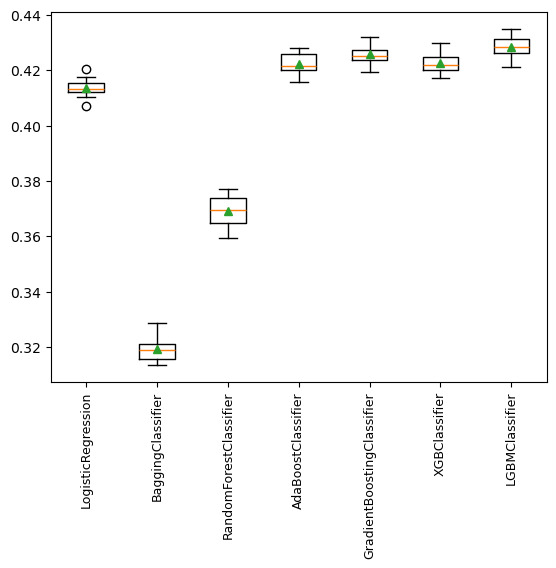

In [38]:
#Sprawdzenie, który z wybranych klasyfikatorów z ustawionymi bazowymi hiperparametrami osiągnie najlepszy wynik pod kątem metryki "f1-score". 
#Uznałem, że jako główną metrykę oceniającą jakość mojego modelu przyjmę "f1-score", gdyż chciałem, aby mój model posiadał odpowiedni balans 
#między osobami, które określiłby za te, które nie mają cukrzycy, a w rzeczywistości ją mają, a tymi osobami, które określiłby za te, które 
#mają cukrzycę, a w rzeczywistości jej nie mają.

#W pipelinie nie zastosowałem żadnego scalera, gdyż z nimi modele w nim zbudowane uzyskiwały gorsze wyniki.
#W związku z tym, że zmienna celu "Diabetes" jest niezbalansowana to w pipelinie zastosowałem na zbiorze metodę SMOTE, aby go zbalansować.
#Chciałem przetestować także na zbiorze metodę SMOTEENN, SMOTETomek i ADASYN, ale udało mi się przetestować tylko metodę ADASYN, bo po 
#zastosowaniu tamtych pozostałych kod bardzo długo by mi się ładował. Metoda ADASYN jednakowoż nie poradziła sobie lepiej niż SMOTE ze 
#zbalansowaniem zbioru
results = list()
for i in range(len(names)):
    pipeline = Pipeline(
        steps=[
            ('smote', SMOTE(random_state=1234)),
            ('model', models[i])
        ])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(fontsize=9, rotation = 90)
plt.show()

In [39]:
#Wczytanie biblioteki optuna w celu znalezienia potencjalnie najlepszych hiperparametrów wybranego klasyfikatora.
import optuna

E:\Programy2\Anaconda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
#Konfiguracja zakresu hiperparametrów LGBMClassifier. Może wydawać się, że wypisałem poniżej za dużo hiperparametrów, ale przetestowałem je 
#na modelu robionym w projekcie dla Pana Maja i wiem, że są one skuteczne.
def objective_LGBMClassifier(trial, X_train, y_train, X_test, y_test):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': trial.suggest_categorical("boosting_type", ["gbdt", "dart", "rf"]),
        'n_estimators': trial.suggest_int("n_estimators", 1, 1000),
        'lambda_l1': trial.suggest_float("lambda_l1", 1e-10, 10.0, log=True),
        'lambda_l2': trial.suggest_float("lambda_l2", 1e-10, 10.0, log=True),
        'learning_rate': trial.suggest_float("learning_rate", 1e-10, 10.0, log=True),
        'num_leaves': trial.suggest_int("num_leaves", 2, 300),
        'feature_fraction': trial.suggest_float("feature_fraction", 0.1, 1.0),
        'bagging_fraction': trial.suggest_float("bagging_fraction", 0.1, 1.0),
        'bagging_freq': trial.suggest_int("bagging_freq", 1, 20),
        'min_child_samples': trial.suggest_int("min_child_samples", 1, 300),
        'min_data_in_leaf': trial.suggest_int("min_data_in_leaf", 1, 300),
        'max_depth': trial.suggest_int("n_estimators", 1, 300),
        'class_weight': trial.suggest_categorical("class_weight", ["balanced", None]),
        'subsample': trial.suggest_float("subsample", 1e-10, 1.0),
        'reg_alpha': trial.suggest_float("reg_alpha", 1e-10, 1.0),
        'reg_lambda': trial.suggest_float("reg_lambda", 1e-10, 1.0),
        'min_split_gain': trial.suggest_float("min_split_gain", 0.0001, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.0001, 1.0),
        'min_child_weight': trial.suggest_float("min_child_weight", 0.0001, 1.0)
    }

    model = LGBMClassifier(**params)

    pipeline = Pipeline([
        ('smote', SMOTE(random_state=1234)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    return f1

In [41]:
#Uruchomienie szukania potecjnalnie najlepszych hiperparametrów LGBMClassifier. 
#n_trials = 100, gdyż mój komputer przy n_trials = 200 ładowałby ten kod bardzo długo.
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=123))
study.optimize(lambda trial: objective_LGBMClassifier(trial, X_train, y_train, X_test, y_test), n_trials=100, n_jobs=-1)

[I 2023-12-28 20:01:06,443] A new study created in memory with name: no-name-4a11257f-e54f-4920-95fa-97fe78ee2189
E:\Programy2\Anaconda\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "n_estimators"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all following. Using these values: {'log': False, 'step': 1, 'low': 1, 'high': 1000}
  warnings.warn(
E:\Programy2\Anaconda\lib\site-packages\optuna\trial\_trial.py:682: RuntimeWarning: Inconsistent parameter values for distribution with name "n_estimators"! This might be a configuration mistake. Optuna allows to call the same distribution with the same name more than once in a trial. When the parameter values are inconsistent optuna only uses the values of the first call and ignores all follow

In [42]:
#Wyświetlenie najlepszych znalezionych hiperparametrów LGBMClassifier.
best_params = study.best_params
print(best_params, study.best_value)

{'boosting_type': 'gbdt', 'n_estimators': 82, 'lambda_l1': 5.677090381788675e-09, 'lambda_l2': 0.0019229896709044613, 'learning_rate': 1.83004537419713e-07, 'num_leaves': 300, 'feature_fraction': 0.19742105465402207, 'bagging_fraction': 0.7443140785306758, 'bagging_freq': 13, 'min_child_samples': 250, 'min_data_in_leaf': 98, 'class_weight': None, 'subsample': 0.6630127730822264, 'reg_alpha': 0.9166835916163786, 'reg_lambda': 0.5257525144468004, 'min_split_gain': 0.9195846228164247, 'colsample_bytree': 0.14005184602446702, 'min_child_weight': 0.157714726443676} 0.4439636095402016


In [43]:
#Zbudowanie modelu z użyciem LGBMClassifier z ustawionymi znalezionymi hiperparametrami i wyświetlenie metryk oceniających jego jakość.
model = LGBMClassifier(**best_params)
pipeline = Pipeline([
        ('smote', SMOTE(random_state=1234)),
        ('model', model)
    ])

pipeline.fit(X_train, y_train)
y_pred_test = pipeline.predict(X_test)

print(classification_report(y_test, y_pred_test))
print("Confussion_matrix:\n", confusion_matrix(y_test, y_pred_test))
print('ROC AUC score:', roc_auc_score(y_test, y_pred_test))

[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=250 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] feature_fraction is set=0.19742105465402207, colsample_bytree=0.14005184602446702 will be ignored. Current value: feature_fraction=0.19742105465402207
[LightGBM] [Warning] lambda_l1 is set=5.677090381788675e-09, reg_alpha=0.9166835916163786 will be ignored. Current value: lambda_l1=5.677090381788675e-09
[LightGBM] [Warning] lambda_l2 is set=0.0019229896709044613, reg_lambda=0.5257525144468004 will be ignored. Current value: lambda_l2=0.0019229896709044613
[LightGBM] [Warning] bagging_fraction is set=0.7443140785306758, subsample=0.6630127730822264 will be ignored. Current value: bagging_fraction=0.7443140785306758
[LightGBM] [Warning] bagging_freq is set=13, subsample_freq=0 will be ignored. Current value: bagging_freq=13
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=250 will be ignored. Current value: min_data_in_leaf=98
[